In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

fatal: destination path 'IMagenet' already exists and is not an empty directory.
test  train  val  wnids.txt  words.txt


We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S12/')


PREPERATION OF DATA SET. SPLIT INTO TRAIN AND TEST DATA SETS

In [3]:
import numpy as np
import cv2
import io
import os
from torch.utils.data import DataLoader, Dataset
#from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import transforms
import zipfile
import torchvision.datasets.folder
 
path = 'IMagenet/tiny-imagenet-200/train'
path_val = 'IMagenet/tiny-imagenet-200/val'

import random
import math
from dataset.dataset_utils import create_and_split_dataset, find_classes
import dataset.dataset_utils as data_utils
import importlib
importlib.reload(data_utils)

g_classes, g_class_to_idx = find_classes(path)

train_file_names = []
test_file_names = []
train_classname_dict = dict()    
test_classname_dict = dict()    
classes_dict = dict()

train_file_names, test_file_names, train_classname_dict, test_classname_dict, classes_dict = create_and_split_dataset(path,g_class_to_idx)

print('n02085620_0.JPEG=',classes_dict['n02085620_0.JPEG'])
print('n02085620_22.JPEG=',classes_dict['n02085620_22.JPEG'])

#Train and, Test data
data_dict = dict()
data_dict['train_files'] = train_file_names
data_dict['test_files'] = test_file_names

from dataset.ImagenetDataset import  ImagenetDataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
from PIL import Image
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
train_tr = transforms.Compose([
                               transforms.RandomResizedCrop(32),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               normalize])
test_tr = transforms.Compose([
                              transforms.ToTensor(),
                              normalize])
        
train_data = ImagenetDataset(path,train_file_names, train_classname_dict,classes_dict,transform = train_tr)
test_data = ImagenetDataset(path,test_file_names,test_classname_dict,classes_dict,test_tr)
print(test_classname_dict)

n02085620_0.JPEG= 24
n02085620_22.JPEG= 24
{'n01443537_254.JPEG': 'n01443537', 'n01443537_58.JPEG': 'n01443537', 'n01443537_494.JPEG': 'n01443537', 'n01443537_395.JPEG': 'n01443537', 'n01443537_2.JPEG': 'n01443537', 'n01443537_140.JPEG': 'n01443537', 'n01443537_81.JPEG': 'n01443537', 'n01443537_244.JPEG': 'n01443537', 'n01443537_39.JPEG': 'n01443537', 'n01443537_64.JPEG': 'n01443537', 'n01443537_177.JPEG': 'n01443537', 'n01443537_428.JPEG': 'n01443537', 'n01443537_13.JPEG': 'n01443537', 'n01443537_67.JPEG': 'n01443537', 'n01443537_416.JPEG': 'n01443537', 'n01443537_125.JPEG': 'n01443537', 'n01443537_30.JPEG': 'n01443537', 'n01443537_298.JPEG': 'n01443537', 'n01443537_263.JPEG': 'n01443537', 'n01443537_111.JPEG': 'n01443537', 'n01443537_113.JPEG': 'n01443537', 'n01443537_338.JPEG': 'n01443537', 'n01443537_203.JPEG': 'n01443537', 'n01443537_4.JPEG': 'n01443537', 'n01443537_451.JPEG': 'n01443537', 'n01443537_435.JPEG': 'n01443537', 'n01443537_27.JPEG': 'n01443537', 'n01443537_147.JPEG': '

SHOW PARAMETERS

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize
from albumentations.pytorch import ToTensor
from models import Resnet18 as resnet18
from transformations import ImagenetTiny_Alb as imnet

from utils.global_fun import show_summary, run_model_with_entropy,  draw_accuracy_loss_change_graps, plot_accuracy_loss_graphs

import importlib
importlib.reload(resnet18)
importlib.reload(imnet)

use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)
CUDA_LAUNCH_BLOCKING=1
imagenet_num_classes = 200
model = resnet18.ResNet18(imagenet_num_classes).to(device)
criterion = torch.nn.CrossEntropyLoss()
importlib.reload(imnet)


imagenet_model = imnet.Imagenet_Alb(model,train_data,test_data,criterion,None,None)

SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)
show_summary(imagenet_model,input_size=(3,32,32))


cuda:0
CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      Batch

FIND LR_MAX USING LR FINDER

  pip install torch-lr-finder -v --global-option="amp"
  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
Max Accuracy = 11.1328125 at LR = 5.7279603098582905


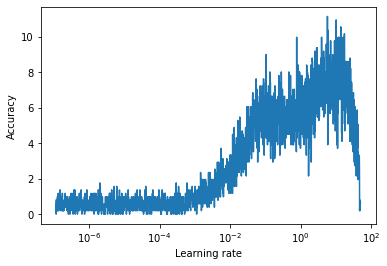

In [5]:
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
#from torchvision.datasets import CIFAR10
from lr_finder import LRFinder as lrfinder
import dataset.ImagenetDataset as imdataset
import importlib

#criterion = nn.CrossEntropyLoss()
importlib.reload(data_utils)
importlib.reload(lrfinder)
importlib.reload(imdataset)

optimizer = optim.SGD(imagenet_model.m_model.parameters(), lr=1e-7)
lr_finder = lrfinder.LRFinder(imagenet_model.m_model, optimizer, criterion, device="cuda")
lr_finder.range_test(imagenet_model.m_train_loader, end_lr=100, num_iter=2000, step_mode="exp")
lr_finder.plot(skip_end=0, accuracy_flag = True)
lr_finder.reset()

ONECYLE LR SET OPTIMIZER AND SCHEDULER

In [0]:
from utils.global_fun import test_model
from utils.global_fun import train_model
from utils.global_fun import show_summary, run_model_with_entropy,  draw_accuracy_loss_change_graps, plot_accuracy_loss_graphs

import utils.global_fun as fun
from models import Resnet18 as resnet18
from transformations import ImagenetTiny_Alb as imnet
#import OneCycleLR_A11 as oneCycle 
from lr_finder import OneCycleLR_A11 as oneCycle

import importlib
importlib.reload(resnet18)
importlib.reload(oneCycle)
importlib.reload(imnet)
importlib.reload(fun) 
#from torch.optim.lr_scheduler import OneCycleLR
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9,weight_decay=5e-04)

lr_max = 0.2630267991895384
lr_min = lr_max / 100
batch_size = 200
iterations = 100000/batch_size

scheduler = oneCycle.OneCycleLR_A11(optimizer, 24, iterations, (lr_min, lr_max), (0.8, 0.95))

imagenet_model.setOptimizer(optimizer)
imagenet_model.setScheduler(scheduler)


RUNNING WITH REGULARIZATION

In [8]:
run_model_with_entropy(imagenet_model, device, doL1= 1, doL2=1, LAMBDA=0.0005, EPOCHS=50)

  0%|          | 0/137 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 0


  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 1074/30000 (3.58%)

EPOCH: 1
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 1


Loss=4.290780544281006 Batch_id=136 Accuracy=8.00: 100%|██████████| 137/137 [00:36<00:00,  3.71it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 1710/30000 (5.70%)

EPOCH: 2
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 2


Loss=4.120708465576172 Batch_id=136 Accuracy=11.68: 100%|██████████| 137/137 [00:36<00:00,  3.72it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 2802/30000 (9.34%)

EPOCH: 3
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 3


Loss=3.695847272872925 Batch_id=136 Accuracy=15.16: 100%|██████████| 137/137 [00:36<00:00,  3.71it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 3062/30000 (10.21%)

EPOCH: 4
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 4


Loss=3.68479585647583 Batch_id=136 Accuracy=18.07: 100%|██████████| 137/137 [00:36<00:00,  3.72it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 4616/30000 (15.39%)

EPOCH: 5
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 5


Loss=3.6026434898376465 Batch_id=136 Accuracy=20.44: 100%|██████████| 137/137 [00:37<00:00,  3.70it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 3831/30000 (12.77%)

EPOCH: 6
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 6


Loss=3.328108787536621 Batch_id=136 Accuracy=22.89: 100%|██████████| 137/137 [00:37<00:00,  3.70it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 5059/30000 (16.86%)

EPOCH: 7
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 7


Loss=3.34843373298645 Batch_id=136 Accuracy=24.57: 100%|██████████| 137/137 [00:36<00:00,  3.70it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 5551/30000 (18.50%)

EPOCH: 8
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 8


Loss=3.1522817611694336 Batch_id=136 Accuracy=26.37: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 5535/30000 (18.45%)

EPOCH: 9
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 9


Loss=3.1832549571990967 Batch_id=136 Accuracy=27.92: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6356/30000 (21.19%)

EPOCH: 10
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 10


Loss=3.033717632293701 Batch_id=136 Accuracy=29.50: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 5892/30000 (19.64%)

EPOCH: 11
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 11


Loss=3.1159067153930664 Batch_id=136 Accuracy=30.55: 100%|██████████| 137/137 [00:37<00:00,  3.67it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 5316/30000 (17.72%)

EPOCH: 12
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 12


Loss=2.9594924449920654 Batch_id=136 Accuracy=31.51: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6171/30000 (20.57%)

EPOCH: 13
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 13


Loss=2.970482587814331 Batch_id=136 Accuracy=32.48: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 5987/30000 (19.96%)

EPOCH: 14
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 14


Loss=2.8865694999694824 Batch_id=136 Accuracy=33.68: 100%|██████████| 137/137 [00:37<00:00,  3.67it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 4974/30000 (16.58%)

EPOCH: 15
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 15


Loss=2.9776432514190674 Batch_id=136 Accuracy=34.30: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6724/30000 (22.41%)

EPOCH: 16
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 16


Loss=2.7227423191070557 Batch_id=136 Accuracy=35.19: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7739/30000 (25.80%)

EPOCH: 17
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 17


Loss=2.6302764415740967 Batch_id=136 Accuracy=35.81: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8658/30000 (28.86%)

EPOCH: 18
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 18


Loss=2.7591280937194824 Batch_id=136 Accuracy=36.46: 100%|██████████| 137/137 [00:37<00:00,  3.67it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7833/30000 (26.11%)

EPOCH: 19
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 19


Loss=2.623541831970215 Batch_id=136 Accuracy=37.06: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7608/30000 (25.36%)

EPOCH: 20
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 20


Loss=2.6317920684814453 Batch_id=136 Accuracy=37.29: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7609/30000 (25.36%)

EPOCH: 21
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 21


Loss=2.7130725383758545 Batch_id=136 Accuracy=38.21: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7349/30000 (24.50%)

EPOCH: 22
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 22


Loss=2.767247200012207 Batch_id=136 Accuracy=38.87: 100%|██████████| 137/137 [00:37<00:00,  3.64it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 6952/30000 (23.17%)

EPOCH: 23
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 23


Loss=2.826690435409546 Batch_id=136 Accuracy=38.95: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 5801/30000 (19.34%)

EPOCH: 24
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 24


Loss=2.6872284412384033 Batch_id=136 Accuracy=39.41: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6401/30000 (21.34%)

EPOCH: 25
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 25


Loss=2.6927459239959717 Batch_id=136 Accuracy=39.74: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8592/30000 (28.64%)

EPOCH: 26
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 26


Loss=2.6179614067077637 Batch_id=136 Accuracy=40.41: 100%|██████████| 137/137 [00:37<00:00,  3.64it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8320/30000 (27.73%)

EPOCH: 27
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 27


Loss=2.530329942703247 Batch_id=136 Accuracy=40.77: 100%|██████████| 137/137 [00:37<00:00,  3.64it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 8108/30000 (27.03%)

EPOCH: 28
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 28


Loss=2.5095624923706055 Batch_id=136 Accuracy=41.07: 100%|██████████| 137/137 [00:37<00:00,  3.63it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8056/30000 (26.85%)

EPOCH: 29
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 29


Loss=2.406463861465454 Batch_id=136 Accuracy=41.37: 100%|██████████| 137/137 [00:38<00:00,  3.61it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7934/30000 (26.45%)

EPOCH: 30
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 30


Loss=2.404188871383667 Batch_id=136 Accuracy=41.70: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 9370/30000 (31.23%)

EPOCH: 31
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 31


Loss=2.4957475662231445 Batch_id=136 Accuracy=42.34: 100%|██████████| 137/137 [00:37<00:00,  3.62it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8665/30000 (28.88%)

EPOCH: 32
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 32


Loss=2.452733278274536 Batch_id=136 Accuracy=42.25: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7610/30000 (25.37%)

EPOCH: 33
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 33


Loss=2.6030406951904297 Batch_id=136 Accuracy=42.60: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8499/30000 (28.33%)

EPOCH: 34
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 34


Loss=2.3666770458221436 Batch_id=136 Accuracy=42.63: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 8036/30000 (26.79%)

EPOCH: 35
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 35


Loss=2.6290762424468994 Batch_id=136 Accuracy=43.14: 100%|██████████| 137/137 [00:37<00:00,  3.61it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8428/30000 (28.09%)

EPOCH: 36
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 36


Loss=2.3721489906311035 Batch_id=136 Accuracy=43.29: 100%|██████████| 137/137 [00:37<00:00,  3.62it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8501/30000 (28.34%)

EPOCH: 37
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 37


Loss=2.4684393405914307 Batch_id=136 Accuracy=43.44: 100%|██████████| 137/137 [00:37<00:00,  3.63it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 9545/30000 (31.82%)

EPOCH: 38
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 38


Loss=2.645861864089966 Batch_id=136 Accuracy=43.75: 100%|██████████| 137/137 [00:37<00:00,  3.63it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8088/30000 (26.96%)

EPOCH: 39
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 39


Loss=2.3117775917053223 Batch_id=136 Accuracy=44.10: 100%|██████████| 137/137 [00:37<00:00,  3.62it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 9177/30000 (30.59%)

EPOCH: 40
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 40


Loss=2.355250597000122 Batch_id=136 Accuracy=44.46: 100%|██████████| 137/137 [00:37<00:00,  3.63it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8714/30000 (29.05%)

EPOCH: 41
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 41


Loss=2.3787598609924316 Batch_id=136 Accuracy=44.18: 100%|██████████| 137/137 [00:37<00:00,  3.62it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 9370/30000 (31.23%)

EPOCH: 42
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 42


Loss=2.4092838764190674 Batch_id=136 Accuracy=44.48: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7027/30000 (23.42%)

EPOCH: 43
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 43


Loss=2.196716785430908 Batch_id=136 Accuracy=44.49: 100%|██████████| 137/137 [00:37<00:00,  3.64it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8480/30000 (28.27%)

EPOCH: 44
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 44


Loss=2.4433388710021973 Batch_id=136 Accuracy=45.15: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7459/30000 (24.86%)

EPOCH: 45
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 45


Loss=2.4570186138153076 Batch_id=136 Accuracy=44.91: 100%|██████████| 137/137 [00:37<00:00,  3.67it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 9164/30000 (30.55%)

EPOCH: 46
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 46


Loss=2.344416856765747 Batch_id=136 Accuracy=45.07: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 11042/30000 (36.81%)

EPOCH: 47
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 47


Loss=2.2759451866149902 Batch_id=136 Accuracy=45.60: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8129/30000 (27.10%)

EPOCH: 48
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 48


Loss=2.2954182624816895 Batch_id=136 Accuracy=45.86: 100%|██████████| 137/137 [00:38<00:00,  3.59it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8844/30000 (29.48%)

EPOCH: 49
L1= 1 ;L2= 0.0005 ;LAMBDA= 0 epoch= 49


Loss=2.4056479930877686 Batch_id=136 Accuracy=45.49: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]



Test set: Average loss: 0.0059, Accuracy: 9903/30000 (33.01%)



RESET THE OPTIMIZER AND SCHEDULER WITH DIFFERENT VALUES

In [0]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9,weight_decay=5e-04)
lr_max = 0.02630267991895384
lr_min = lr_max / 10
batch_size = 200
iterations = 100000/batch_size

scheduler = oneCycle.OneCycleLR_A11(optimizer, 24, iterations, (lr_min, lr_max), (0.8, 0.95))
#cifar_model(optimizer,scheduler)

imagenet_model.setOptimizer(optimizer)
imagenet_model.setScheduler(scheduler)

In [11]:
run_model_with_entropy(imagenet_model, device, doL1= 0, doL2=0, LAMBDA=0, EPOCHS=25,start=50)

  0%|          | 0/137 [00:00<?, ?it/s]

EPOCH: 50
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 0


Loss=1.821168303489685 Batch_id=136 Accuracy=54.94: 100%|██████████| 137/137 [00:37<00:00,  3.65it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 14467/30000 (48.22%)

EPOCH: 51
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 1


Loss=1.5815807580947876 Batch_id=136 Accuracy=58.54: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 14421/30000 (48.07%)

EPOCH: 52
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 2


Loss=1.7147575616836548 Batch_id=136 Accuracy=60.04: 100%|██████████| 137/137 [00:37<00:00,  3.67it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 14976/30000 (49.92%)

EPOCH: 53
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 3


Loss=1.5292929410934448 Batch_id=136 Accuracy=61.19: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 14843/30000 (49.48%)

EPOCH: 54
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 4


Loss=1.6579512357711792 Batch_id=136 Accuracy=61.92: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 14854/30000 (49.51%)

EPOCH: 55
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 5


Loss=1.3682342767715454 Batch_id=136 Accuracy=62.96: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 15034/30000 (50.11%)

EPOCH: 56
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 6


Loss=1.4761946201324463 Batch_id=136 Accuracy=63.35: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 15154/30000 (50.51%)

EPOCH: 57
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 7


Loss=1.498450517654419 Batch_id=136 Accuracy=64.00: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 14778/30000 (49.26%)

EPOCH: 58
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 8


Loss=1.2901874780654907 Batch_id=136 Accuracy=64.78: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 15218/30000 (50.73%)

EPOCH: 59
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 9


Loss=1.4287669658660889 Batch_id=136 Accuracy=65.48: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 15052/30000 (50.17%)

EPOCH: 60
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 10


Loss=1.3488038778305054 Batch_id=136 Accuracy=66.10: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 15054/30000 (50.18%)

EPOCH: 61
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 11


Loss=1.498302936553955 Batch_id=136 Accuracy=66.51: 100%|██████████| 137/137 [00:36<00:00,  3.71it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 15223/30000 (50.74%)

EPOCH: 62
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 12


Loss=1.3059778213500977 Batch_id=136 Accuracy=66.49: 100%|██████████| 137/137 [00:36<00:00,  3.72it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 15222/30000 (50.74%)

EPOCH: 63
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 13


Loss=1.3668795824050903 Batch_id=136 Accuracy=67.04: 100%|██████████| 137/137 [00:36<00:00,  3.73it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 14953/30000 (49.84%)

EPOCH: 64
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 14


Loss=1.3707716464996338 Batch_id=136 Accuracy=67.74: 100%|██████████| 137/137 [00:36<00:00,  3.72it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 15159/30000 (50.53%)

EPOCH: 65
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 15


Loss=1.4573488235473633 Batch_id=136 Accuracy=68.06: 100%|██████████| 137/137 [00:36<00:00,  3.70it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 14831/30000 (49.44%)

EPOCH: 66
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 16


Loss=1.4282662868499756 Batch_id=136 Accuracy=68.04: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 15014/30000 (50.05%)

EPOCH: 67
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 17


Loss=1.2724300622940063 Batch_id=136 Accuracy=68.55: 100%|██████████| 137/137 [00:37<00:00,  3.70it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 15127/30000 (50.42%)

EPOCH: 68
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 18


Loss=1.2309718132019043 Batch_id=136 Accuracy=69.27: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 15121/30000 (50.40%)

EPOCH: 69
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 19


Loss=1.2191894054412842 Batch_id=136 Accuracy=69.77: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 14964/30000 (49.88%)

EPOCH: 70
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 20


Loss=1.390537977218628 Batch_id=136 Accuracy=69.99: 100%|██████████| 137/137 [00:37<00:00,  3.67it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 14806/30000 (49.35%)

EPOCH: 71
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 21


Loss=1.3846769332885742 Batch_id=136 Accuracy=70.51: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 14927/30000 (49.76%)

EPOCH: 72
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 22


Loss=1.2236778736114502 Batch_id=136 Accuracy=70.82: 100%|██████████| 137/137 [00:37<00:00,  3.68it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 15318/30000 (51.06%)

EPOCH: 73
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 23


Loss=1.191273808479309 Batch_id=136 Accuracy=70.88: 100%|██████████| 137/137 [00:37<00:00,  3.67it/s]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 14762/30000 (49.21%)

EPOCH: 74
L1= 0 ;L2= 0 ;LAMBDA= 0 epoch= 24


Loss=1.2454620599746704 Batch_id=136 Accuracy=71.29: 100%|██████████| 137/137 [00:37<00:00,  3.66it/s]



Test set: Average loss: 0.0044, Accuracy: 14545/30000 (48.48%)



TRAINING AND ACCURACY CHANGE GRAPH

0  and  75


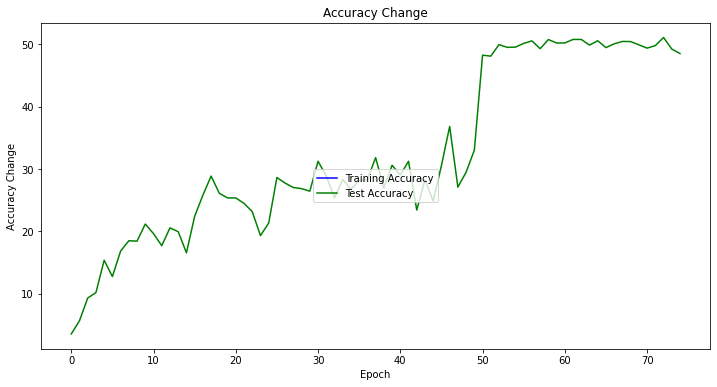

In [12]:
import utils.global_fun as fun
importlib.reload(fun)

importlib.reload(fun)
from utils.global_fun import plot_accuracy_loss_graphs, draw_accuracy_graph
print(len(imagenet_model.m_train_acc),' and ',len(imagenet_model.m_test_acc))
draw_accuracy_graph(imagenet_model,'Accuracy Change')

LR FINDER

Increases the learning rate in an exponential manner and computes the training loss for each learning rate. lr_finder.plot() plots the training loss versus logarithmic learning rate.


Learning rate search finished. See the graph with {finder_name}.plot()
Max Accuracy = 74.8046875 at LR = 3.0199517204020165e-07


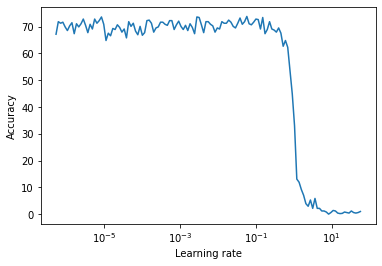

In [0]:
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from lr_finder import LRFinder as lrfinder

model = resnet18.ResNet18(200).to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(imagenet_model.m_model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = lrfinder.LRFinder(imagenet_model.m_model, optimizer, criterion, device="cuda")
lr_finder.range_test(imagenet_model.m_train_loader, end_lr=100, num_iter=150, step_mode="exp")
lr_finder.plot(accuracy_flag = True)

lr_finder.reset()

#model = rc10.resnet56()
#lr_finder = LRFinder(model,cifar_model.m_optimizer,cifar_model.m_criterion, device)
#lr_finder.range_test(cifar_model.m_trainloader, end_lr=100, num_iter=100, step_mode="exp")
